In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('deliveries.csv')
data = pd.read_csv('matches - matches.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [5]:
def run_rate(x):
    mask = df['batsman_runs'] == x
    return df[mask].groupby('batsman').size().sort_values(ascending=False)

run_rate(6)

batsman
CH Gayle         266
SK Raina         174
RG Sharma        173
DA Warner        160
V Kohli          160
                ... 
Sohail Tanvir      1
T Kohli            1
T Henderson        1
A Mithun           1
A Choudhary        1
Length: 301, dtype: int64

In [6]:
death_over = df[df['over'].isin([16,17,18,19,20])]
all_batsman = death_over.groupby('batsman')['batsman_runs']
runs = all_batsman.sum()
ball = all_batsman.count()
ball = ball[ball > 200]
((runs/ball)*100).sort_values(ascending=False).head(10)

batsman
AB de Villiers    211.052632
DA Warner         189.473684
DA Miller         186.666667
V Kohli           181.868132
RG Sharma         175.668449
DJ Hussey         175.213675
RV Uthappa        173.454545
Yuvraj Singh      171.124031
JH Kallis         170.562771
MS Dhoni          169.607843
Name: batsman_runs, dtype: float64

In [7]:
new = df.merge(data, left_on='match_id', right_on="id")
print("shape",new.shape)
new.head(5)

shape (150460, 39)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [8]:
run_by_season_batsman = (new.groupby(['season','batsman'])['batsman_runs'].sum().sort_values(ascending=False))
run_by_season_batsman.reset_index() #series into dataframe

,season,batsman,batsman_runs
0,2016,V Kohli,973
1,2016,DA Warner,848
2,2012,CH Gayle,733
3,2013,MEK Hussey,733
4,2013,CH Gayle,720
...,...,...,...
1526,2011,VR Aaron,0
1527,2017,MM Patel,0
1528,2011,ND Doshi,0
1529,2011,S Nadeem,0


In [9]:
type(run_by_season_batsman.reset_index()) #type

pandas.core.frame.DataFrame

In [10]:
run_by_season_batsman.reset_index().shape #numbers of rows & columns

(1531, 3)

In [11]:
run_by_season_batsman.reset_index().sort_values(['season','batsman_runs'],ascending = (True,False)).drop_duplicates(subset=['batsman'],keep='first')

,season,batsman,batsman_runs
10,2008,SE Marsh,616
27,2008,G Gambhir,534
31,2008,ST Jayasuriya,514
51,2008,SR Watson,472
66,2008,GC Smith,441
...,...,...,...
1213,2017,DM Bravo,6
1250,2017,TA Boult,5
1343,2017,RD Chahar,3
1365,2017,Mohammad Nabi,2


In [12]:
run_by_season_batsman.reset_index().sort_values(['season','batsman_runs'],ascending = (True,False)).drop_duplicates(subset=['season'],keep='first')

,season,batsman,batsman_runs
10,2008,SE Marsh,616
14,2009,ML Hayden,572
9,2010,SR Tendulkar,618
11,2011,CH Gayle,608
2,2012,CH Gayle,733
3,2013,MEK Hussey,733
6,2014,RV Uthappa,660
17,2015,DA Warner,562
0,2016,V Kohli,973
7,2017,DA Warner,641


## 🏏Most 6s per season...

In [13]:
mask = new['batsman_runs'] == 6
new[mask].groupby(['season','batsman'])['batsman_runs'].count().reset_index().sort_values(['season',"batsman_runs"],ascending=[True,False]).drop_duplicates(subset=['season'])

,season,batsman,batsman_runs
80,2008,ST Jayasuriya,31
102,2009,AC Gilchrist,29
245,2010,RV Uthappa,27
286,2011,CH Gayle,44
388,2012,CH Gayle,59
486,2013,CH Gayle,52
591,2014,GJ Maxwell,36
661,2015,CH Gayle,38
829,2016,V Kohli,38
856,2017,DA Warner,26


In [14]:
mask = new['batsman_runs'] == 4
new[mask].groupby(['season','batsman'])['batsman_runs'].count().reset_index().sort_values(['season','batsman_runs'],ascending=(True,False)).drop_duplicates(subset=['season'])

,season,batsman,batsman_runs
28,2008,G Gambhir,68
176,2009,ML Hayden,60
334,2010,SR Tendulkar,86
464,2011,SR Tendulkar,67
500,2012,AM Rahane,73
683,2013,MEK Hussey,81
814,2014,RV Uthappa,74
856,2015,DA Warner,65
956,2016,DA Warner,88
1070,2017,DA Warner,63


## Pivoit

In [15]:
data1 = {
    "Region": ['North','South','East','West','North','South','East','West'],
    "Product": ["A","A","A","A","B","B","B","B"],
    "Sales": [100,150,200,130,300,250,220,280]
}

df = pd.DataFrame(data1)
print(df)

  Region Product  Sales
0  North       A    100
1  South       A    150
2   East       A    200
3   West       A    130
4  North       B    300
5  South       B    250
6   East       B    220
7   West       B    280


In [16]:
pivot = pd.pivot_table(df,
                       index="Region",
                       columns="Product",
                       values="Sales",
                       aggfunc="count"
                       )
print(pivot)

Product  A  B
Region       
East     1  1
North    1  1
South    1  1
West     1  1


In [17]:
mask = new['batsman_runs'] == 6
six = new[mask]
pt = six.pivot_table(index="batting_team", columns="over", values="batsman_runs", aggfunc="count")
pt

over,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
batting_team,,,,,,,,,,,,,,,,,,,,
Chennai Super Kings,5.0,17.0,37.0,34.0,41.0,43.0,22.0,25.0,23.0,23.0,36.0,36.0,35.0,45.0,43.0,46.0,51.0,58.0,54.0,68.0
Deccan Chargers,3.0,21.0,11.0,17.0,27.0,22.0,11.0,13.0,17.0,14.0,15.0,26.0,23.0,22.0,20.0,21.0,38.0,37.0,23.0,19.0
Delhi Daredevils,14.0,19.0,30.0,41.0,29.0,27.0,20.0,26.0,32.0,24.0,34.0,38.0,37.0,35.0,28.0,43.0,56.0,44.0,59.0,50.0
Gujarat Lions,4.0,6.0,14.0,9.0,11.0,12.0,10.0,6.0,11.0,8.0,5.0,7.0,5.0,8.0,5.0,5.0,7.0,9.0,9.0,4.0
Kings XI Punjab,10.0,19.0,27.0,36.0,30.0,39.0,19.0,35.0,36.0,29.0,37.0,38.0,47.0,41.0,51.0,59.0,39.0,57.0,53.0,60.0
Kochi Tuskers Kerala,2.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,3.0,1.0,3.0,2.0,3.0,4.0,NaN,3.0,4.0,5.0,2.0
Kolkata Knight Riders,10.0,13.0,28.0,35.0,25.0,34.0,26.0,25.0,27.0,21.0,34.0,32.0,42.0,31.0,40.0,50.0,55.0,52.0,45.0,34.0
Mumbai Indians,9.0,17.0,22.0,28.0,43.0,50.0,18.0,23.0,35.0,22.0,33.0,49.0,51.0,50.0,53.0,66.0,60.0,86.0,72.0,89.0
Pune Warriors,5.0,6.0,6.0,7.0,7.0,3.0,5.0,10.0,9.0,6.0,13.0,5.0,10.0,13.0,13.0,16.0,13.0,12.0,18.0,19.0


<Axes: xlabel='over', ylabel='batting_team'>

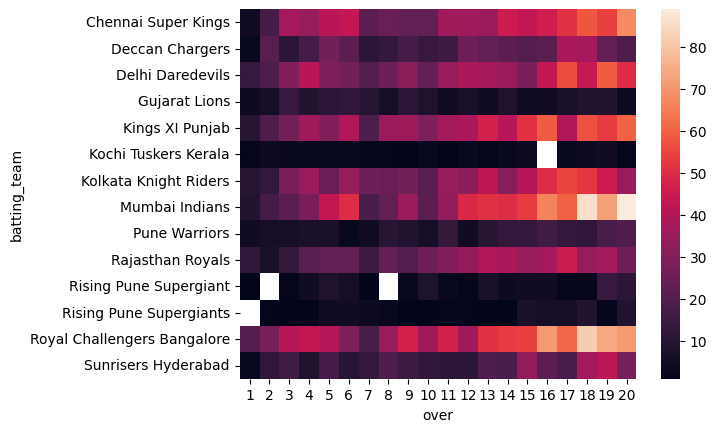

In [18]:
import seaborn as sms
sms.heatmap(pt)